In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import random
from scipy.optimize import curve_fit
import math
from tqdm import tqdm

In [2]:
M_list = np.loadtxt('M.txt', dtype = float)
M_list = M_list.tolist()

Chi_list = np.loadtxt('chi.txt',dtype = float)
Chi_list = Chi_list.tolist()

E_list = np.loadtxt('E.txt',dtype = float)
E_list = E_list.tolist()

Cv_list = np.loadtxt('cv.txt', dtype = float)
Cv_list = Cv_list.tolist()

S0SR_list = pd.read_hdf("s0sr_data.h5",key = 'data')

In [3]:
S0SR_list

,0,1,2,3,4,5,6,7,8,9,...,901,902,903,904,905,906,907,908,909,910
0,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]",...,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]"
1,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]",...,"[1, -1, -1, -1, -1, -1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]"
2,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, -1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, -1, 1]","[1, 1, 1, 1, 1, 1]",...,"[1, 1, 1, -1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]"
3,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, -1, 1, 1, -1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, -1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]",...,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, -1, -1, -1, 1, -1]","[1, -1, -1, -1, 1, -1]","[1, -1, 1, 1, 1, -1]","[1, 1, 1, 1, 1, 1]"
4,"[1, 1, 1, 1, 1, -1]","[1, -1, -1, -1, -1, -1]","[1, 1, 1, 1, 1, 1]","[1, 1, -1, 1, 1, 1]","[1, -1, 1, -1, 1, -1]","[1, -1, 1, -1, 1, -1]","[1, -1, 1, -1, 1, -1]","[1, -1, 1, -1, 1, -1]","[1, -1, 1, -1, 1, -1]","[1, -1, -1, -1, -1, -1]",...,"[1, 1, 1, -1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, -1, 1, 1, 1, 1]","[1, -1, 1, 1, 1, 1]","[1, 1, 1, -1, 1, 1]","[1, -1, 1, 1, 1, 1]","[1, 1, 1, -1, 1, 1]"
5,"[1, 1, 1, 1, -1, 1]","[1, 1, 1, 1, 1, 1]","[1, -1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, -1, 1, -1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, -1, 1, 1]","[1, 1, 1, 1, 1, 1]",...,"[1, 1, 1, 1, 1, 1]","[1, 1, -1, 1, 1, -1]","[1, 1, -1, 1, 1, -1]","[1, 1, -1, 1, 1, -1]","[1, 1, 1, 1, 1, 1]","[1, 1, -1, -1, 1, 1]","[1, 1, -1, -1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, -1, 1, 1, -1, 1]","[1, 1, 1, 1, 1, 1]"
6,"[1, 1, -1, -1, 1, 1]","[1, -1, 1, 1, 1, 1]","[1, -1, -1, -1, -1, -1]","[1, 1, 1, -1, -1, -1]","[1, -1, -1, 1, 1, 1]","[1, 1, 1, 1, -1, 1]","[1, 1, 1, 1, -1, 1]","[1, -1, 1, -1, 1, 1]","[1, -1, 1, -1, 1, 1]","[1, 1, 1, 1, -1, 1]",...,"[1, 1, -1, 1, -1, -1]","[1, 1, -1, 1, -1, -1]","[1, 1, -1, 1, -1, -1]","[1, -1, 1, -1, 1, 1]","[1, 1, 1, 1, -1, 1]","[1, 1, 1, 1, 1, 1]","[1, -1, -1, 1, -1, -1]","[1, -1, 1, 1, -1, 1]","[1, -1, 1, 1, -1, 1]","[1, 1, 1, 1, 1, 1]"
7,"[1, 1, -1, -1, 1, -1]","[1, 1, -1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, -1, -1, -1, -1]",...,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, -1]","[1, 1, 1, 1, -1, 1]","[1, 1, 1, -1, 1, 1]","[1, 1, 1, -1, 1, 1]","[1, 1, 1, -1, 1, 1]","[1, 1, 1, -1, 1, 1]","[1, 1, -1, -1, -1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, -1, -1, -1, -1]"
8,"[1, 1, 1, 1, -1, 1]","[1, 1, 1, 1, -1, 1]","[1, 1, 1, 1, 1, 1]","[1, -1, -1, 1, 1, -1]","[1, -1, -1, 1, 1, -1]","[1, 1, -1, 1, 1, 1]","[1, 1, -1, 1, 1, 1]","[1, -1, 1, -1, 1, 1]","[1, -1, 1, -1, 1, 1]","[1, -1, -1, -1, -1, -1]",...,"[1, -1, 1, -1, 1, -1]","[1, -1, -1, -1, -1, -1]","[1, -1, -1, -1, -1, -1]","[1, -1, -1, -1, -1, -1]","[1, -1, -1, -1, -1, -1]","[1, -1, 1, 1, -1, 1]","[1, -1, 

In [6]:
T=[4.0, 5.0, 6.0, 7.0, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.2, 10.0, 11.0, 12.0, 13.0]

## Fit Magetization Function

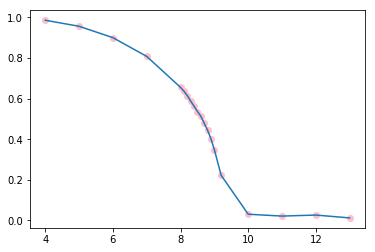

In [7]:
plt.plot(T, M_list,'o',color = 'pink')#color = 'pink'
plt.plot(T, M_list)
plt.show()

In [8]:
def m(T,Tc,A,exponent,b):
    return A*(abs(Tc-T))**(exponent)+b

In [873]:
mag,mag_div = curve_fit(m,T[0:16],M_list[0:16],p0 = np.array([8.7,100,0.5,1]),
                      bounds = ([7,-np.inf,0.45,-np.inf],[8.9,np.inf,0.55,np.inf]),maxfev = 10000)

In [874]:
mag[0],mag[1],mag[-2],mag[-1]

(8.896484828878513,
 0.32348116713163616,
 0.5068964574582856,
 0.3136971882457659)

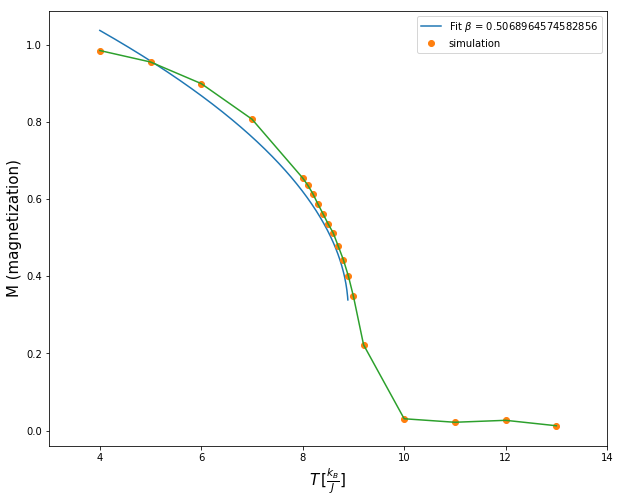

In [875]:
#mag = np.array([7.0, 0.6, 0.5, 0.00001])
plt.figure(figsize=(10,8))
plt.plot(np.linspace(4,8.89,1000), m(np.linspace(4,8.89,1000),*mag),label='Fit $\\beta$ = '+str(mag[2]))
plt.plot(T[0:], M_list[0:],'o',label = "simulation")
plt.plot(T[0:], M_list[0:])
plt.xlim(3,14)
plt.xlabel('$T \\, [\\frac{k_B}{J}]$',fontsize=15)
plt.ylabel('M (magnetization)',fontsize=15)
plt.legend()
plt.show()

In [876]:
_beta = mag[-2]
_beta

0.5068964574582856

In [877]:
_Tc1 = mag[0]
_Tc1

8.896484828878513

# Fit Susceptibility

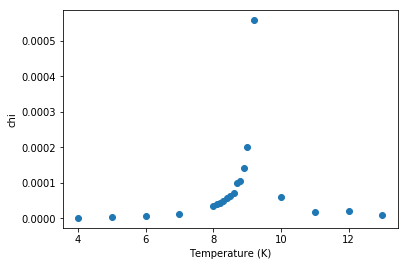

In [878]:
plt.plot(T, Chi_list,'o')#color = 'pink'
#plt.plot(T, Chi_list)
plt.xlabel("Temperature (K)")
plt.ylabel ("chi")
plt.show()

In [879]:
def chi(T,Tc,A,gamma,b):
    return A*(abs(Tc-T))**(-gamma)-b

In [880]:
suscp,suscp_dev = curve_fit(chi,T[0:14],Chi_list[0:14],p0 = np.array([9,0.5,2,0.0021]),
                      bounds = ([8,0,1,0],[9.0,np.inf,3,np.inf]),maxfev = 1000000)

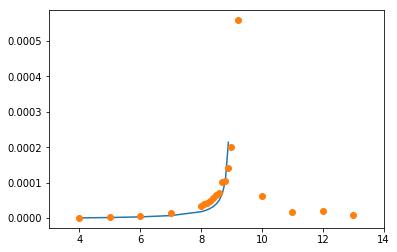

In [881]:
#suscp = np.array([8.3, 0.02786061, 1, 0.01740345])
plt.plot(T[:14], chi(np.array(T[:14]),*suscp))
plt.plot(T[0:], Chi_list[0:],'o')
plt.xlim(3,14)
plt.show()

In [882]:
suscp

array([9.00000000e+00, 2.18080966e-05, 1.00003648e+00, 4.33165129e-06])

In [883]:
suscp_dev

array([[ 4.78972299e-02, -6.01543336e-06,  3.13614464e-01,
        -5.61408178e-06],
       [-6.01543336e-06,  1.07338453e-09, -4.53589303e-05,
         1.03521946e-09],
       [ 3.13614464e-01, -4.53589303e-05,  2.16958174e+00,
        -4.27196943e-05],
       [-5.61408178e-06,  1.03521946e-09, -4.27196943e-05,
         1.08421719e-09]])

In [884]:
suscm,suscm_dev = curve_fit(chi,T[15:],Chi_list[15:],p0 = np.array([8.7, 3.024e-05, 1, 1e-05]),
                      bounds = ([8,0,0.8,0],[8.8,np.inf,1.001,np.inf]),maxfev = 100000)

In [885]:
suscm

array([8.79999973e+00, 2.49895531e-04, 1.00098540e+00, 8.36155653e-05])

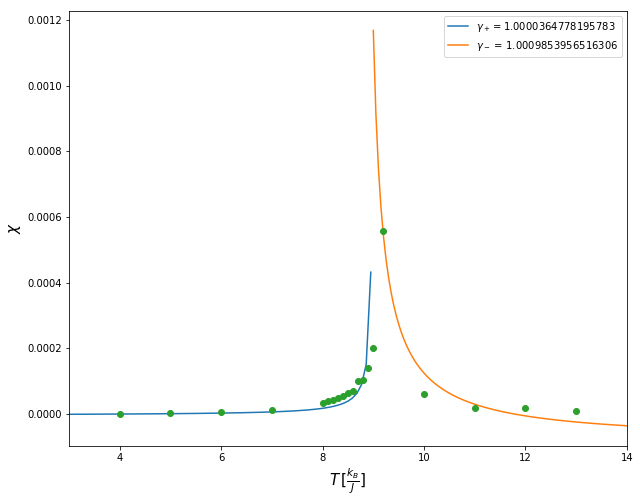

In [886]:
plt.figure(figsize=(10,8))
plt.plot(np.linspace(0,8.95,100), chi(np.linspace(0,8.95,100),*suscp),label = '$\gamma_+ = $'+str(suscp[-2]))
plt.plot(np.linspace(9,14,100), chi(np.linspace(9,14,100),*suscm),label = '$\gamma_-$ = '+str(suscm[-2]))
plt.plot(T[0:], Chi_list[0:],'o')
plt.xlim(3,14)
plt.xlabel('$T \\, [\\frac{k_B}{J}]$',fontsize=15)
plt.ylabel ("$\chi$",fontsize = 15)
plt.legend()
plt.show()

In [887]:
_gammap = suscp[-2]
_gammam = suscm[-2]

_gamma = (_gammap+_gammam)/2
_gamma

1.0005109367356044

In [888]:
_Tc2 = (suscm[0]+suscp[0])/2
_Tc2

8.899999864337355

## Heat Capacity Fit

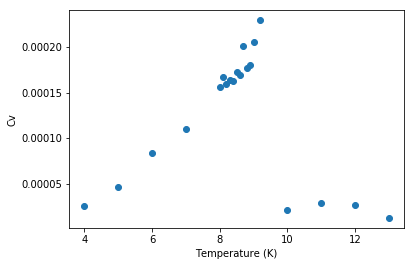

In [889]:
plt.plot(T, Cv_list,'o')#color = 'pink'
#plt.plot(T, Cv_list)
plt.xlabel("Temperature (K)")
plt.ylabel ("Cv")
plt.show()

In [890]:
def cv(T,Tc,A,alpha,b):
    return A*(abs(Tc-T))**(-alpha)-b

In [891]:
heatcap,heatcap_dev = curve_fit(chi,T,Cv_list,p0 = np.array([8.75,0.5,0.0004,0.00001]),
                                bounds = ([0,-np.inf,-np.inf,-np.inf],[np.inf,np.inf,np.inf,np.inf]),maxfev = 100000)

#bounds = ([8.4,0,0,0],[9,np.inf,np.inf,np.inf])

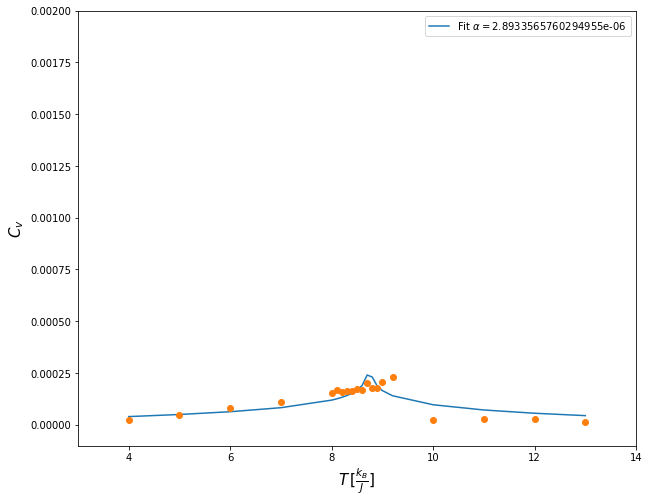

In [892]:
#heatcap=np.array([8.7,0.6,0.0004,0.5996])
plt.figure(figsize=(10,8))
plt.plot(T, cv(np.array(T),*heatcap),label = 'Fit $\\alpha = $'+str(heatcap[-2]))
plt.plot(T[0:], Cv_list[0:],'o')
plt.xlabel('$T \\, [\\frac{k_B}{J}]$',fontsize=15)
plt.ylabel ("$C_v$",fontsize = 15)
plt.xlim(3,14)
plt.ylim(-0.0001,0.002)
plt.legend()
plt.show()

In [893]:
heatcap

array([8.74433020e+00, 1.48487237e+01, 2.89335658e-06, 1.48486171e+01])

In [894]:
_Tc3 = heatcap[0]
_Tc3

8.744330196047304

In [895]:
_alpha = heatcap[-2]
_alpha

2.8933565760294955e-06

In [896]:
Ave_Tc = (_Tc1+_Tc2+_Tc3)/3
Ave_Tc

8.846938296421056

## Fit Correction Function

In [897]:
G_T = []
for t in range(len(T)):
    G = []
    double=0
    single1=0
    single2=0
    for r in range(1,4):
        double = 0
        single1 =0
        single2 =0
        for nstep in range(0,900):
            double+=S0SR_list[nstep][t][r]
            #single1+=S0[n][i]
            #single2+=S0[n][i]
        #G.append(double/len(S0SR)-(single1/len(S0))*(single2/len(SR)))
        G.append(abs(double/(900)))
        
    G_T.append(G)

In [898]:
T[12] # The closed value in our simulation

8.8

In [899]:
def Corr(r,eta):
    return r**(-5+2-eta)

eps,eps_div = curve_fit(Corr,np.array(range(1,4)),np.array(G_T[12]), maxfev = 100000)

# Using nv = gamma/(2-eta)
eta = eps[0]
nv = _gamma/(2-eta)
nv

0.4716721392528047

In [901]:
6**6

46656

In [903]:
10**4

10000

In [904]:
20**3

8000